## **Data Cleaning and Exploratory Analysis of Global Superstore Sales for Business Optimization**

### **PROBLEM STATEMENT**
The Global Superstore Sales Dataset contains transaction records of a multinational retail chain over several years. However, the dataset includes missing values, duplicate records, and incorrect data, making data cleaning a crucial step before analysis. The goal is to clean and preprocess the data by handling null values, detecting and removing duplicates, and correcting inconsistencies. Once cleaned, the dataset will be used to analyze sales performance, customer trends, and profit patterns across different regions. Through exploratory data analysis and visualizations, we will uncover sales trends, customer buying behavior, and high-profit product categories. Finally, using statistical techniques, we will evaluate factors influencing profitability and delivery efficiency to optimize business strategies.

### **OBJECTIVES**
1. **Data Cleaning & Preprocessing:**
   - Identify and handle missing values appropriately.
   - Detect and remove duplicate records.
   - Correct inconsistencies in data (e.g., formatting errors, invalid entries).
   - Convert data types to their appropriate formats for analysis.

2. **Exploratory Data Analysis (EDA):**
   - Analyze sales performance across different regions and time periods.
   - Identify customer buying trends and segment customers based on purchasing behavior.
   - Determine high-revenue and high-profit product categories.
   - Visualize trends using charts and graphs for better insights.

3. **Statistical Analysis:**
   - Evaluate key factors affecting profitability and sales trends.
   - Analyze delivery efficiency and its impact on customer satisfaction.
   - Identify relationships between different attributes (e.g., sales vs. discount impact on profit).

4. **Business Insights & Recommendations:**
   - Provide data-driven recommendations to optimize pricing, inventory, and supply chain.
   - Suggest strategies to improve customer retention and sales growth.
   - Highlight areas of inefficiency and propose solutions for operational improvements.



#### **1) Importing relevant libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import color_palette
from scipy import stats



#### **2) LOADING OUR 'global_superstore_sales_messy' DATASET**


In [5]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Python_datasets\INT-375\global_superstore_sales_messy.csv')
print(df.head())  # Printing the dataset

  Order ID  Order Date   Ship Date       Ship Mode Customer ID Customer Name  \
0  ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   Alice Smith   
1  ORD1001  2020-01-02  2020-01-06        Same Day    CUST5001      John Doe   
2  ORD1002  2020-01-03  2020-01-11        Same Day    CUST5002  Emma Johnson   
3  ORD1003  2020-01-04  2020-01-09  Standard Class    CUST5003  Robert Brown   
4  ORD1004  2020-01-05  2020-01-12  Standard Class    CUST5004   Alice Smith   

       Segment   Region  Country         Category Sub-Category  \
0     Consumer     West  Germany        Furniture       Phones   
1    Corporate    South      USA       Technology       Phones   
2  Home Office  Central       UK  Office Supplies  Accessories   
3     Consumer    South   Mexico       Technology       Tables   
4    Corporate    South      USA       Technology      Binders   

      Product Name  Quantity  Discount   Sales  Profit Delivery Status  
0    Standing Desk         8      0.25  491.06  1

 #### **3) EXPLORING THE DATASET**

In [7]:
print("Information of the Dataset:",df.info())
print("Description of the Dataset:", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order ID         4700 non-null   object 
 1   Order Date       4700 non-null   object 
 2   Ship Date        4700 non-null   object 
 3   Ship Mode        4700 non-null   object 
 4   Customer ID      4700 non-null   object 
 5   Customer Name    4589 non-null   object 
 6   Segment          4700 non-null   object 
 7   Region           4700 non-null   object 
 8   Country          4700 non-null   object 
 9   Category         4700 non-null   object 
 10  Sub-Category     4700 non-null   object 
 11  Product Name     4700 non-null   object 
 12  Quantity         4700 non-null   int64  
 13  Discount         4700 non-null   float64
 14  Sales            4597 non-null   float64
 15  Profit           4599 non-null   float64
 16  Delivery Status  4700 non-null   object 
dtypes: float64(3),

#### **4) HANDLING THE MISSING VALUES**

In [8]:
print("Missing Values Before Cleaning:\n", df.isnull().sum())

df["Sales"] = df["Sales"].fillna(df["Sales"].mean())         # Fill Sales with mean
df["Profit"] = df["Profit"].fillna(df["Profit"].median())       # Fill Profit with median
df["Customer Name"] = df["Customer Name"].fillna(df["Customer Name"].mode()[0])     # Fill Name with mode

df.replace("", pd.NA, inplace=True)          # Convert empty strings to NaN
df.dropna(inplace=True)          # Remove remaining NaNs

print("Missing Values After Cleaning:\n", df.isnull().sum())

print(df)           ## Printing the cleaned dataset




Missing Values Before Cleaning:
 Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name      111
Segment              0
Region               0
Country              0
Category             0
Sub-Category         0
Product Name         0
Quantity             0
Discount             0
Sales              103
Profit             101
Delivery Status      0
dtype: int64
Missing Values After Cleaning:
 Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Region             0
Country            0
Category           0
Sub-Category       0
Product Name       0
Quantity           0
Discount           0
Sales              0
Profit             0
Delivery Status    0
dtype: int64
     Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0     ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   
1     ORD1001  2020-01-

#### **5) PERFORMING SOME BASIC OPERATIONS**

In [13]:
print("First 20 rows of the dataset : ",df.head(20))
print("Last 20 rows of the dataset : ",df.tail(20))
print("Shape of the dataset : ",df.shape)
print("Datatype of the dataset : ",df.dtypes)


First 20 rows of the dataset :     Order ID  Order Date   Ship Date       Ship Mode Customer ID Customer Name  \
0   ORD1000  2020-01-01  2020-01-08  Standard Class    CUST5000   Alice Smith   
1   ORD1001  2020-01-02  2020-01-06        Same Day    CUST5001      John Doe   
2   ORD1002  2020-01-03  2020-01-11        Same Day    CUST5002  Emma Johnson   
3   ORD1003  2020-01-04  2020-01-09  Standard Class    CUST5003  Robert Brown   
4   ORD1004  2020-01-05  2020-01-12  Standard Class    CUST5004   Alice Smith   
5   ORD1005  2020-01-06  2020-01-09  Standard Class    CUST5005      John Doe   
6   ORD1006  2020-01-07  2020-01-14     First Class    CUST5006  Emma Johnson   
7   ORD1007  2020-01-08  2020-01-16     First Class    CUST5007      John Doe   
8   ORD1008  2020-01-09  2020-01-14        Same Day    CUST5008   Alice Smith   
9   ORD1009  2020-01-10  2020-01-14     First Class    CUST5009      John Doe   
10  ORD1010  2020-01-11  2020-01-19    Second Class    CUST5010  Emma Johnson

#### **6) Handling Duplicates**

In [12]:
print(f"Duplicate rows: {df.duplicated().sum()}")           # Check for duplicates
df.drop_duplicates(inplace=True)                # Remove duplicates

Duplicate rows: 196


#### **7) Converting datatypes**

In [9]:
df["Order Date"] = pd.to_datetime(df["Order Date"])         # Convert Order Date column to datetime

#### **8) Fixing inconsistencies**

In [14]:
print("Unique Categories : ",df["Category"].unique())              # Check unique values
df["Category"] = df["Category"].str.strip().str.title()             # Fix inconsistent category names

Unique Categories :  ['Furniture' 'Technology' 'Office Supplies']



#### **9) Final Cleaned Data**

In [15]:
import pandas as pd
df.to_csv("Cleaned_Data.csv", index=False)
print("Saved Successfully")

Saved Successfully


#### **10) Statistical Analysis**

In [16]:
## CENTRAL TENDENCY
print("Mean sales : ",df['Sales'].mean())
print("Median Profit : ",df['Profit'].median())
print("Mode Segment : ",df['Segment'].mode()[0])

Mean sales :  245.8167217750707
Median Profit :  13.5
Mode Segment :  Corporate


In [17]:
## DISPERSION
print("Standard Deviation of Profit : ",df['Profit'].std())
print("Variance of sales : ",df['Sales'].var())
print("Range of quantity : ",df['Quantity'].max()-df['Quantity'].min())

Standard Deviation of Profit :  68.87237224785106
Variance of sales :  23391.788538475666
Range of quantity :  8


In [18]:
## UNDERSTANDING THE SHAPE AND DISTRIBUTION OF DATA
print("Sales Skewness:", df['Sales'].skew())
print("Profit Kurtosis:", df['Profit'].kurtosis())

Sales Skewness: -0.5087794856684305
Profit Kurtosis: 0.32861576387452995


               Quantity  Discount     Sales    Profit  Profit_Margin
Quantity       1.000000  0.041050 -0.008615 -0.030684      -0.035915
Discount       0.041050  1.000000  0.003491  0.009180       0.010736
Sales         -0.008615  0.003491  1.000000  0.167419       0.030109
Profit        -0.030684  0.009180  0.167419  1.000000       0.830592
Profit_Margin -0.035915  0.010736  0.030109  0.830592       1.000000


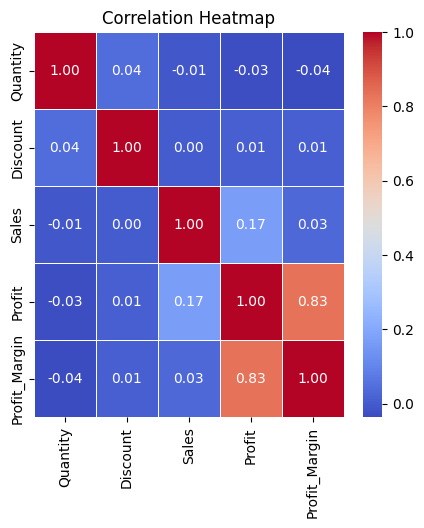

In [31]:
## CORRELATION ANALYSIS
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt='.2f',linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
## COMPARING MEAN AND DISTRIBUTIONS ACROSS CATEGORIES
df.groupby('Region')['Profit'].mean().sort_values()

## IDENTIFYING WHICH REGION IS MOST PROFITABLE BASED ON AVERAGE
df.groupby('Segment')['Sales'].agg(['mean', 'median', 'std'])

,mean,median,std
Segment,,,
Consumer,247.928258,248.190,155.926287
Corporate,246.979705,245.995,158.256901
Home Office,242.526634,244.650,144.204731


                         Sales    Profit  Total Orders
Category                                              
Furniture        377385.338375  39318.09          1571
Office Supplies  380436.408540  37929.54          1510
Technology       397516.845427  38320.70          1619


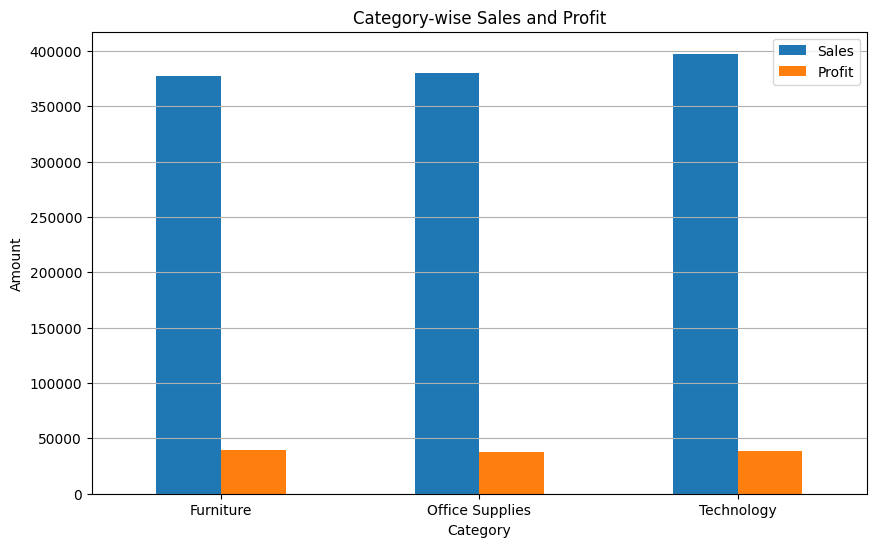

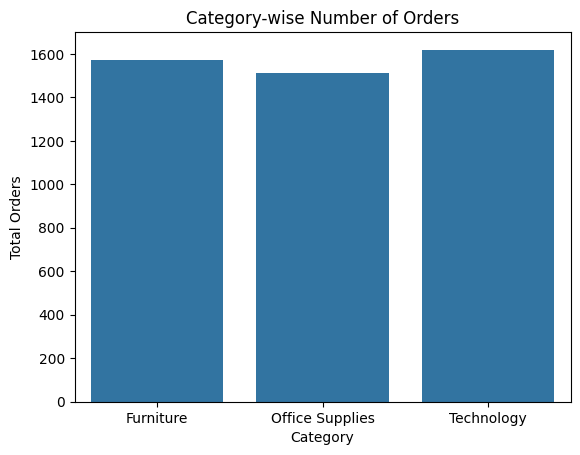

In [22]:
## GROUPING AND VISUALIZING CATEGORY-WISE REVENUE, PROFIT & SALES
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'   # Assuming 'Order ID' exists for counting sales
}).rename(columns={'Order ID': 'Total Orders'})
print(category_summary)

## A) Bar plot for Sales & Profit by Category
category_summary[['Sales', 'Profit']].plot(kind='bar', figsize=(10,6))
plt.title('Category-wise Sales and Profit')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## B) Bar plot for Total Orders per Category
sns.barplot(x=category_summary.index, y=category_summary['Total Orders'])
plt.title('Category-wise Number of Orders')
plt.ylabel('Total Orders')
plt.xlabel('Category')
plt.show()



##### **Profit Margin and Cost estimation**

In [22]:
total_profit = df['Profit'].sum()
print(f"Total Profit: {total_profit:.2f}")


Total Profit: 115568.33


In [27]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
category_profit=df.groupby('Category')['Profit_Margin'].mean().sort_values(ascending=False)
print(category_profit)


Category
Furniture          0.098715
Office Supplies    0.097090
Technology         0.091303
Name: Profit_Margin, dtype: float64


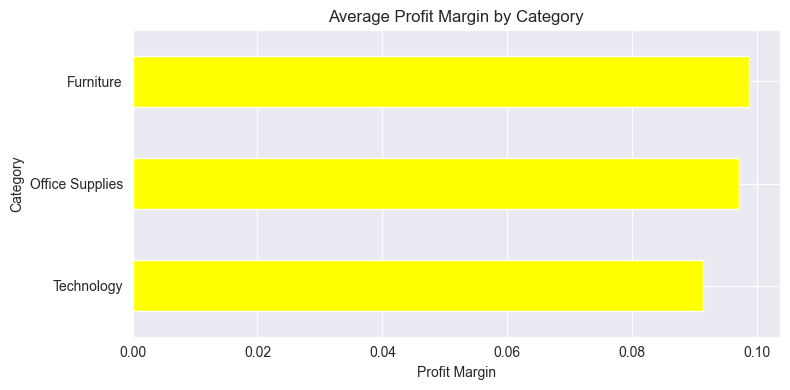

In [29]:
plt.figure(figsize=(8, 4))
category_profit.plot(kind='barh', color='yellow')
plt.title('Average Profit Margin by Category')
plt.xlabel('Profit Margin')
plt.ylabel('Category')
plt.gca().invert_yaxis()  # To show highest at top
plt.tight_layout()
plt.show()

In [10]:
total_sales = df['Sales'].sum()
print(f"Total Sales Revenue: {total_sales:.2f}")


Total Sales Revenue: 1155338.59


##### **Discount Impact Analysis**

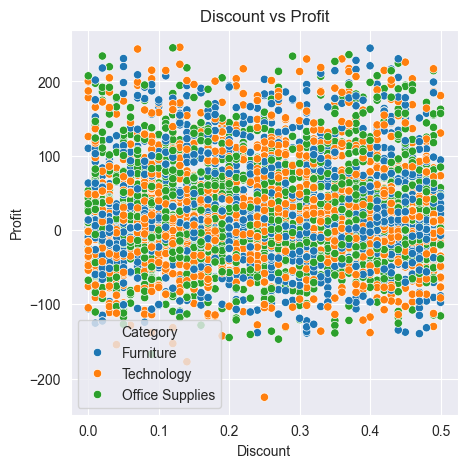

,Discount,Profit
Discount,1.00000,0.00918
Profit,0.00918,1.00000


In [53]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Discount vs Profit')
plt.show()

df[['Discount', 'Profit']].corr()


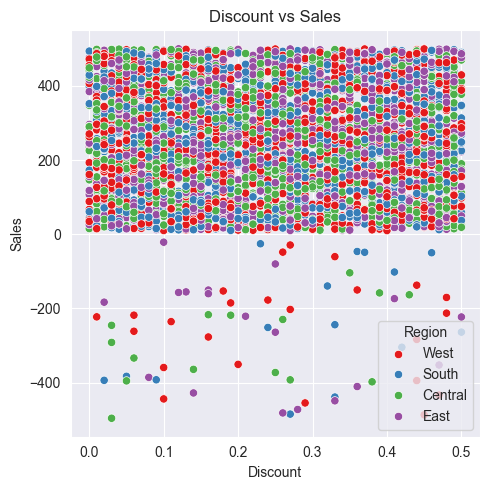

In [56]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Discount', y='Sales', hue='Region', palette='Set1')
plt.title('Discount vs Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


##### **High and Low Performing Products**

In [27]:
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
print("Top performing Products : \n",top_products)
print("Bottom performing Products : \n",bottom_products)

Top performing Products : 
 Product Name
USB Drive          26739.61
Office Chair       23645.35
Notebook Binder    23107.04
Standing Desk      21524.87
Smartphone         20551.46
Name: Profit, dtype: float64
Bottom performing Products : 
 Product Name
Smartphone         20551.46
Standing Desk      21524.87
Notebook Binder    23107.04
Office Chair       23645.35
USB Drive          26739.61
Name: Profit, dtype: float64


##### **Trend analysis over time**

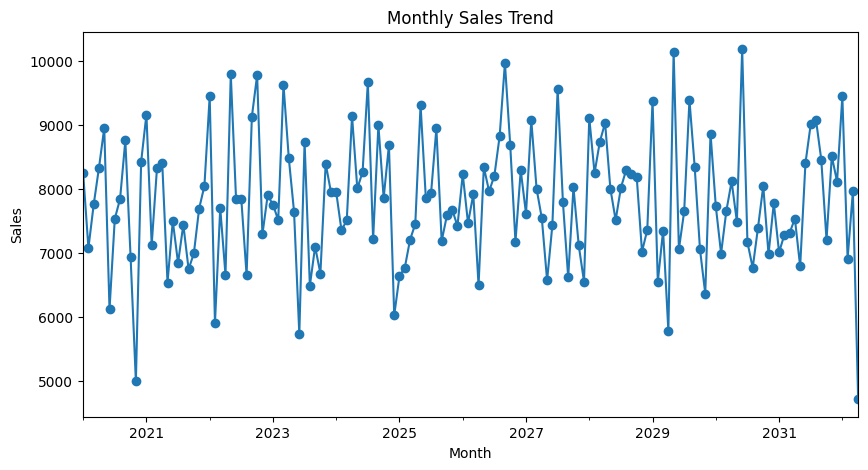

In [28]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()


##### **Regional Performance Comparision**

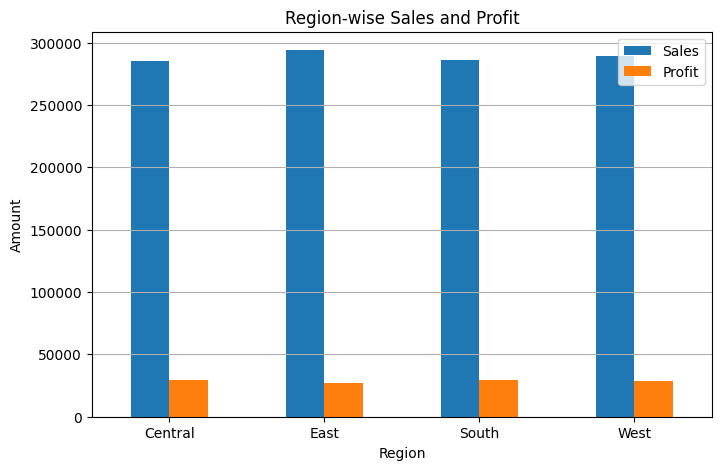

In [29]:
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum()
region_perf.plot(kind='bar', figsize=(8,5))
plt.title('Region-wise Sales and Profit')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [15]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
print("Sales by region : \n",sales_by_region)
print("Sales by category : \n",sales_by_category)
print("Sales by subcategory : \n ",sales_by_subcategory)


Sales by region : 
     Region          Sales
0  Central  285555.408044
1     East  294010.348210
2    South  286130.884766
3     West  289641.951323
Sales by category : 
           Category          Sales
0        Furniture  377385.338375
1  Office Supplies  380436.408540
2       Technology  397516.845427
Sales by subcategory : 
    Sub-Category          Sales
0  Accessories  219170.090992
1      Binders  179914.307218
2       Chairs  202281.794436
3       Phones  203243.461323
4      Storage  177830.347383
5       Tables  172898.590992


In [17]:
df_time = df.groupby('Order Date')['Sales'].sum().reset_index()
df_time['Year'] = df_time['Order Date'].dt.year
sales_by_year = df_time.groupby('Year')['Sales'].sum().reset_index()
print("Sales by year : \n",sales_by_year)

Sales by year : 
     Year         Sales
0   2020  90933.863774
1   2021  90789.813774
2   2022  95901.943940
3   2023  92082.467383
4   2024  96635.993774
5   2025  91957.203774
6   2026  97545.290496
7   2027  91885.597218
8   2028  97726.693774
9   2029  93900.217052
10  2030  92271.603774
11  2031  94683.093609
12  2032  29024.810000


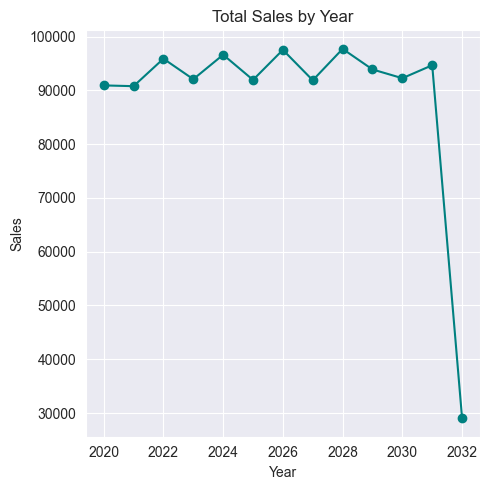

In [19]:
plt.figure(figsize=(5,5))
plt.plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o', linestyle='-', color='teal')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Profitability Heatmap by Region, Segment  & Category**

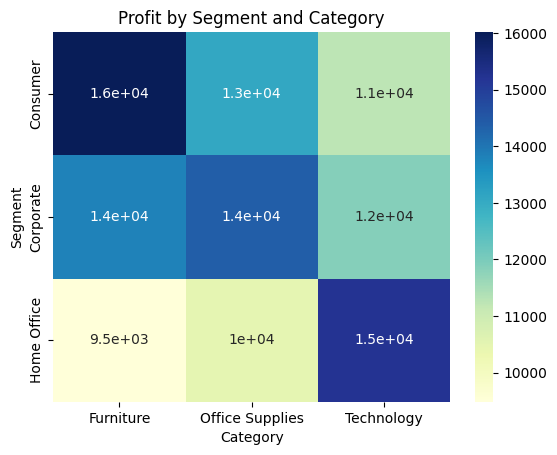

In [30]:
pivot = df.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Profit by Segment and Category')
plt.show()


In [20]:
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()
print("Sales by segment : \n",sales_by_segment)

Sales by segment : 
        Segment          Sales
0     Consumer  383545.015097
1    Corporate  394179.608706
2  Home Office  377613.968540


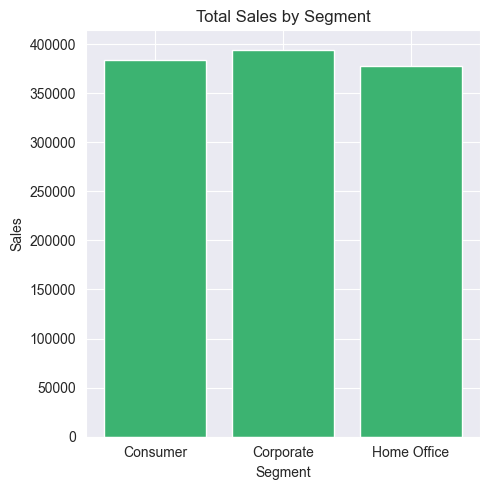

In [21]:
plt.figure(figsize=(5, 5))
plt.bar(sales_by_segment['Segment'], sales_by_segment['Sales'], color='mediumseagreen')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Profit by region: 
     Region    Profit
0  Central  29706.50
1     East  27289.36
2    South  29734.38
3     West  28838.09


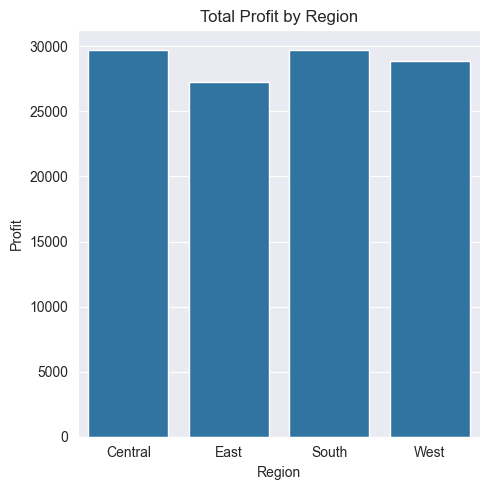

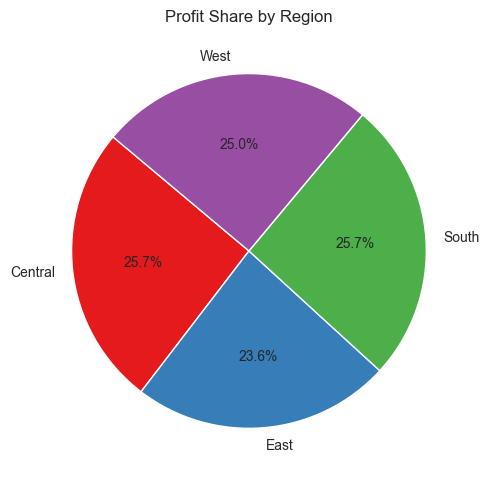

In [50]:
# Grouping
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
print("Profit by region: \n",profit_by_region)


plt.figure(figsize=(5, 5))
sns.barplot(data=profit_by_region, x='Region', y='Profit')  # Removed the 'palette' argument
plt.title('Total Profit by Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


colors = sns.color_palette('Set1', len(profit_by_region))

plt.figure(figsize=(5, 5))
plt.pie(profit_by_region['Profit'], labels=profit_by_region['Region'],
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Profit Share by Region')
plt.axis('equal')
plt.tight_layout()
plt.show()


Profit by subcategory : 
            Category Sub-Category   Profit
0         Furniture  Accessories  8256.38
1         Furniture      Binders  6537.51
2         Furniture       Chairs  8530.98
3         Furniture       Phones  4916.03
4         Furniture      Storage  4388.50
5         Furniture       Tables  6688.69
6   Office Supplies  Accessories  7700.52
7   Office Supplies      Binders  6552.08
8   Office Supplies       Chairs  6564.38
9   Office Supplies       Phones  6634.39
10  Office Supplies      Storage  5255.13
11  Office Supplies       Tables  5223.04
12       Technology  Accessories  6845.24
13       Technology      Binders  5231.87
14       Technology       Chairs  7352.09
15       Technology       Phones  7443.46
16       Technology      Storage  6682.75
17       Technology       Tables  4765.29


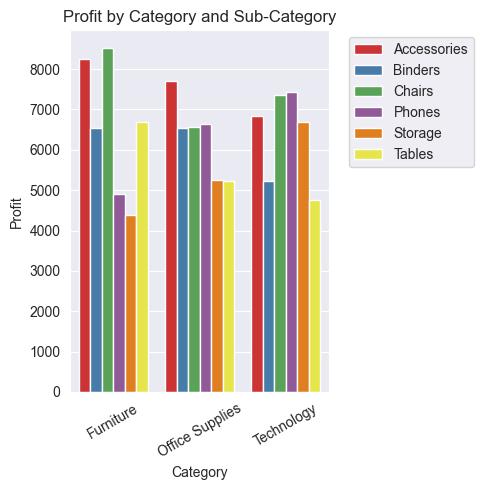

In [52]:
# Group by both Category and Sub-Category
profit_by_subcategory = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
print("Profit by subcategory : \n",profit_by_subcategory)

plt.figure(figsize=(5, 5))
sns.barplot(data=profit_by_subcategory, x='Category', y='Profit', hue='Sub-Category', palette='Set1')
plt.title('Profit by Category and Sub-Category')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### **Pareto Analysis : Identifying whether a small number of products/customers drive most of the sales.**

In [42]:
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
product_sales.cumsum() / product_sales.sum()  # Plot this for pareto curve


Product Name
Notebook Binder    0.217164
USB Drive          0.425660
Smartphone         0.618991
Standing Desk      0.809751
Office Chair       1.000000
Name: Sales, dtype: float64

#### **11) Uni-Variate Analysis**

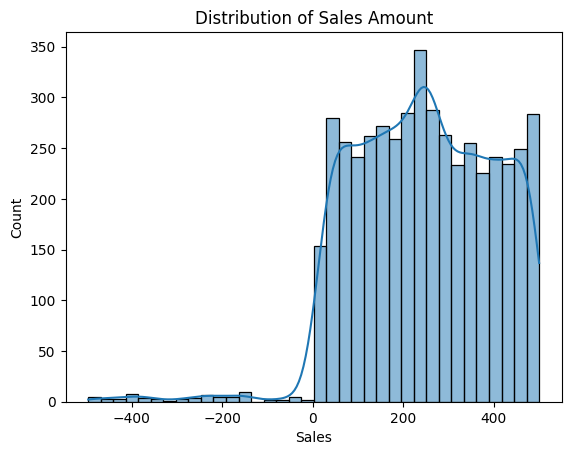

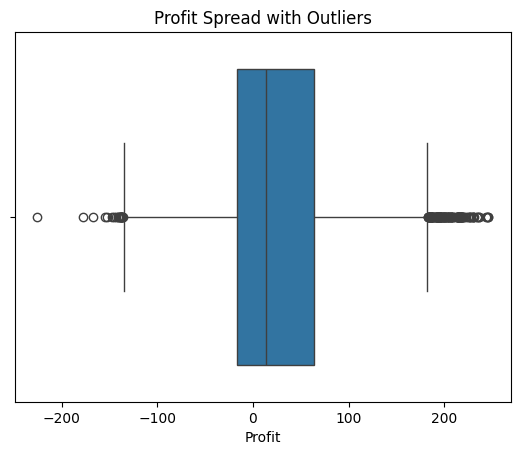

In [58]:
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales Amount')
plt.show()
sns.boxplot(x=df['Profit'])
plt.title('Profit Spread with Outliers')
plt.show()


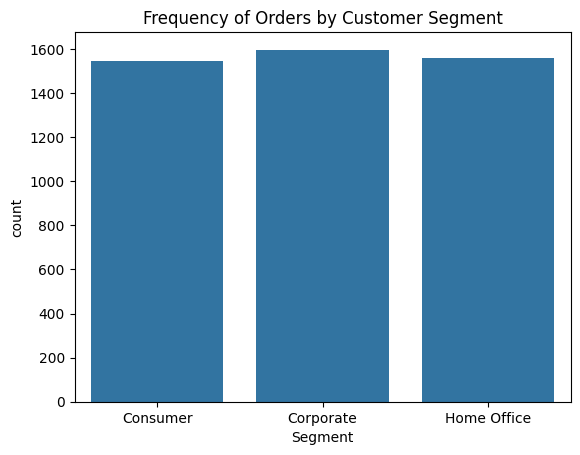

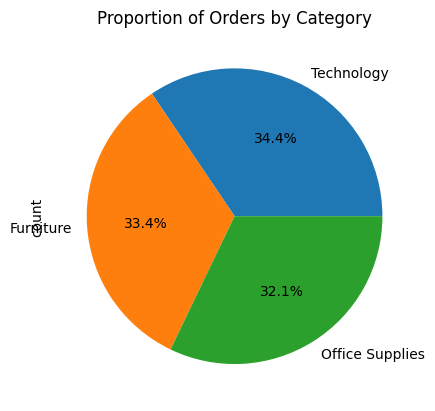

In [59]:
sns.countplot(x='Segment', data=df)
plt.title('Frequency of Orders by Customer Segment')
plt.show()
df['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Orders by Category')
plt.show()


#### **12) Bi-Variate Analysis**

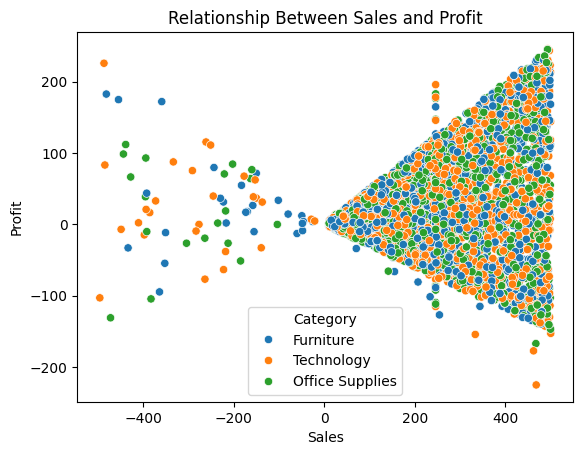

In [60]:
## Numerical v/s Numerical
sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=df['Category'])
df[['Sales', 'Profit', 'Discount']].corr()
plt.title('Relationship Between Sales and Profit')
plt.show()


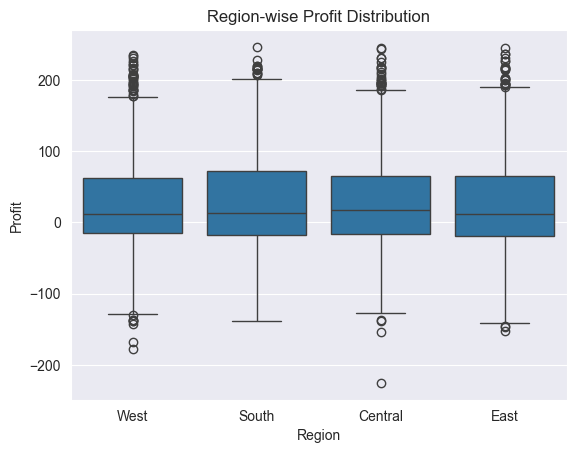

In [10]:
## Categorical v/s Numerical
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Region-wise Profit Distribution')
plt.show()

#### **Performance Analysis on Country level**

<Figure size 500x500 with 0 Axes>

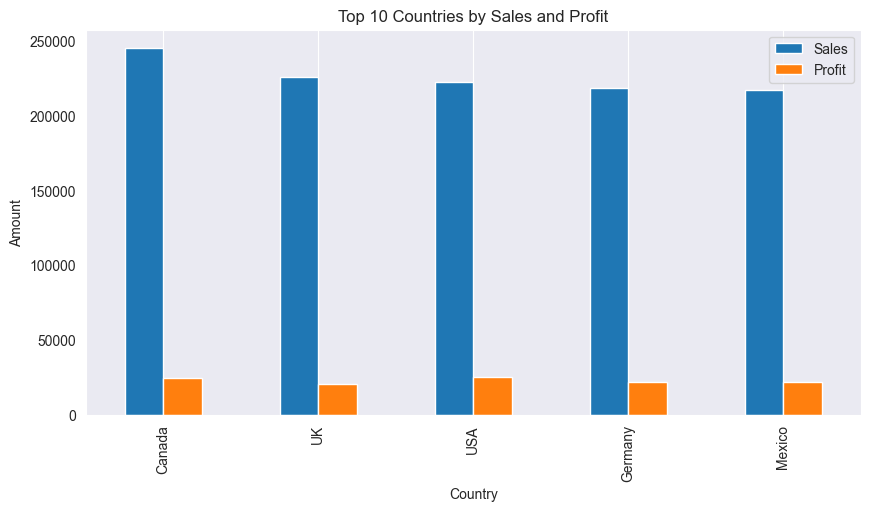

In [12]:
plt.figure(figsize=(5, 5))
country_perf = df.groupby('Country')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False).head(10)
country_perf.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Sales and Profit")
plt.ylabel("Amount")
plt.grid(axis='y')
plt.show()


#### **13) Multi-Variate Analysis**

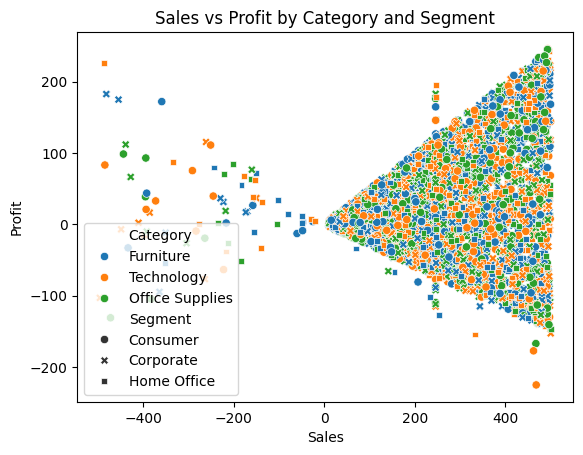

In [62]:
sns.scatterplot(x=df['Sales'], y=df['Profit'], hue=df['Category'], style=df['Segment'])
plt.title('Sales vs Profit by Category and Segment')
plt.show()

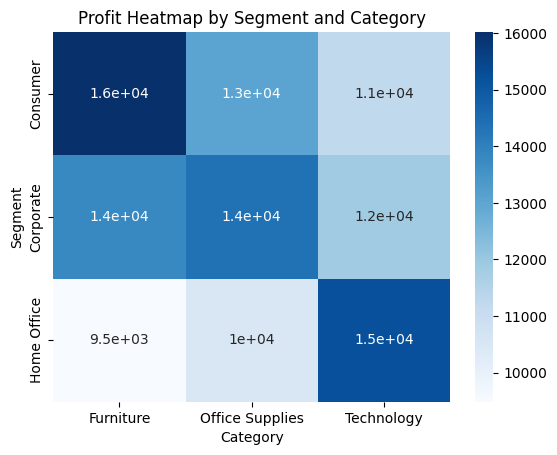

In [57]:
pivot = df.pivot_table(index='Segment', columns='Category', values='Profit', aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='Blues')
plt.title('Profit Heatmap by Segment and Category')
plt.show()


        Ship Mode  Count
0    Second Class   1229
1     First Class   1172
2        Same Day   1156
3  Standard Class   1143


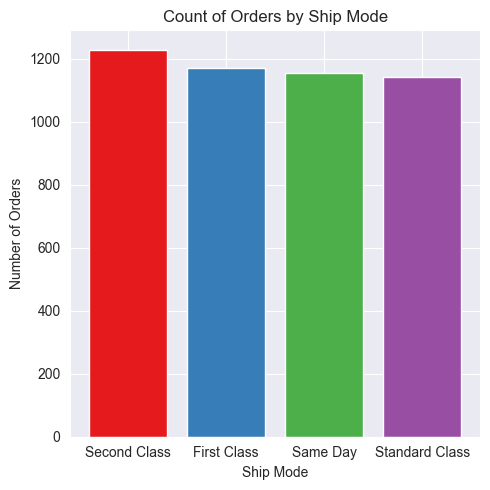

In [67]:
# Ship Mode Counts
ship_mode_counts = df['Ship Mode'].value_counts().reset_index()
ship_mode_counts.columns = ['Ship Mode', 'Count']
print(ship_mode_counts)

plt.figure(figsize=(5, 5))
plt.bar(ship_mode_counts['Ship Mode'], ship_mode_counts['Count'], color=sns.color_palette('Set1'))
plt.title('Count of Orders by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


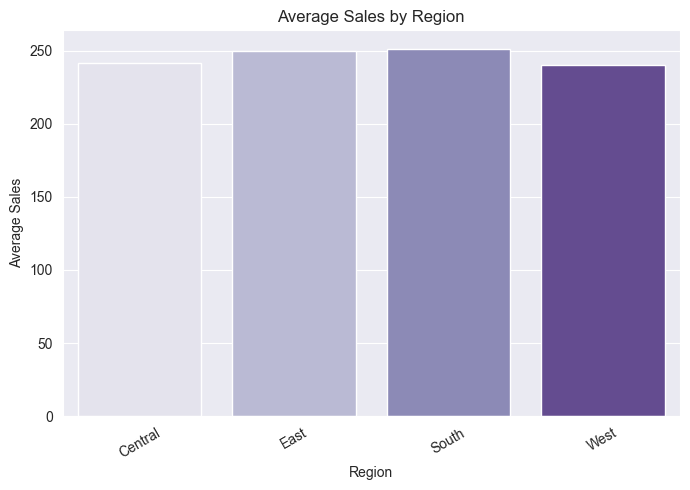

In [86]:
# Average Sales by Region
avg_sales_by_region = df.groupby('Region')['Sales'].mean().reset_index()

plt.figure(figsize=(7, 5))  # Slightly wider for better label spacing
sns.barplot(data=avg_sales_by_region, x='Region', y='Sales', palette='Purples',hue='Region')
plt.title('Average Sales by Region')
plt.xlabel('Region')
plt.ylabel('Average Sales')
plt.xticks(rotation=30)  # Optional: rotate if Region names are long
plt.tight_layout()
plt.show()


#### **14) Trends Over Time**

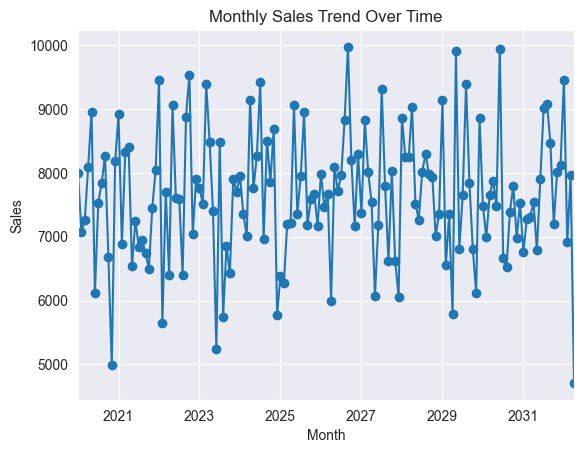

In [23]:
import matplotlib.pyplot as plt

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Create 'Month' column with monthly periods
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by 'Month' and sum 'Sales'
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


##### **Discount Optimization Strategy**

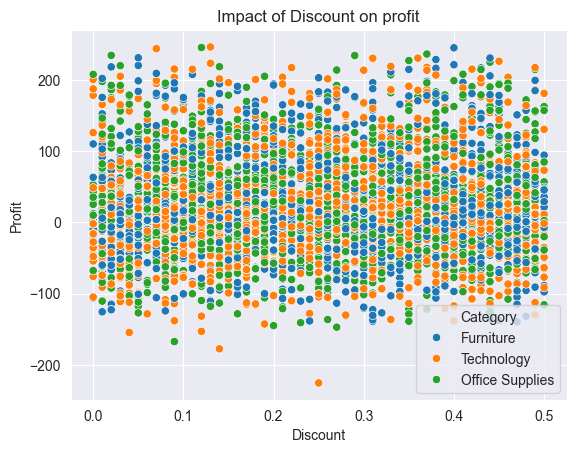

In [8]:
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df)
plt.title('Impact of Discount on profit')
plt.show()

#### **15) Treating Outliers**

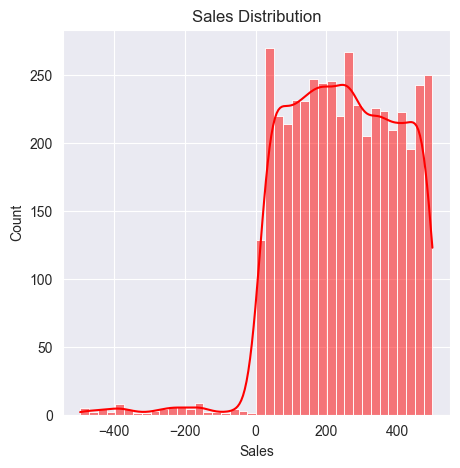

In [30]:
# Plotting Boxplot before removal of outliers
plt.figure(figsize=(5,5))
sns.histplot(data=df["Sales"],bins = 40, color = 'red', kde =True)
plt.title('Sales Distribution')
plt.show()

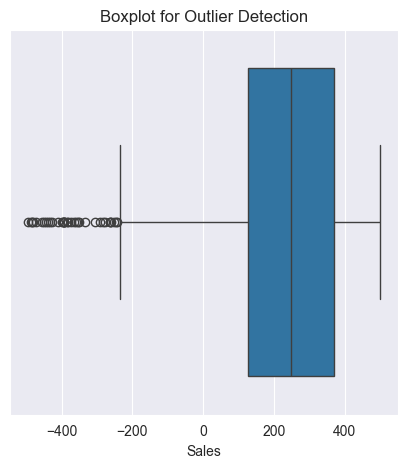

In [31]:
column = 'Sales'
plt.figure(figsize = (5,5))
sns.boxplot(x=df[column])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [29]:
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
print('q1 = ',q1,'\nq3 = ', q3)
IQR = q3 - q1
print('\nIQR = ',IQR)
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
print('Lower Bound = ',lower_bound,'\nUpper Bound = ', upper_bound)
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print('Outliers detected:\n', outliers[column])

q1 =  127.82 
q3 =  371.54

IQR =  243.72000000000003
Lower Bound =  -237.76000000000005 
Upper Bound =  737.1200000000001
Outliers detected:
 168    -333.51
230    -243.75
310    -454.57
557    -484.69
610    -433.46
626    -472.18
677    -382.81
692    -481.50
957    -395.11
960    -263.92
963    -276.82
1038   -350.62
1314   -385.59
1325   -438.70
1343   -392.30
1443   -291.39
2030   -397.64
2106   -359.07
2145   -364.05
2321   -263.69
2939   -261.34
3118   -352.31
3121   -372.57
3324   -393.60
3393   -486.65
3666   -495.84
3682   -251.09
3852   -304.42
3880   -394.28
4035   -427.66
4082   -245.36
4162   -448.83
4300   -443.74
4483   -392.13
4589   -410.38
4601   -283.35
Name: Sales, dtype: float64


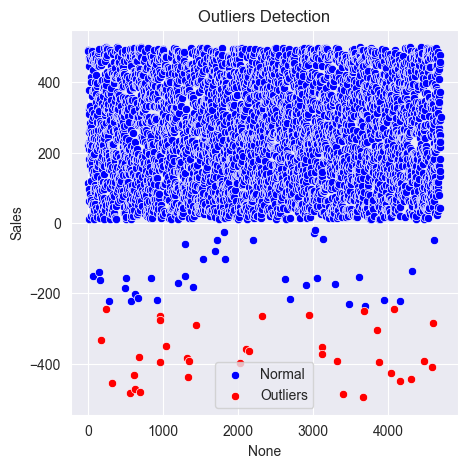

In [28]:
#Scatter plot
plt.figure(figsize = (5,5))
sns.scatterplot(x = df.index, y = df['Sales'], color = 'blue',label = 'Normal')
sns.scatterplot(x = outliers.index,y = outliers['Sales'], color = 'red',label = 'Outliers')
plt.title('Outliers Detection')
plt.legend()
plt.show()

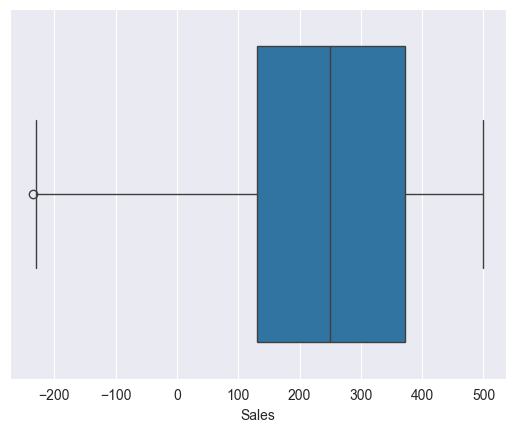

In [27]:
#Removing Outliers
df_clean = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]
sns.boxplot(x = df_clean['Sales'])
plt.show()

#### **16) Z-Score based Outlier removal**

In [32]:
from scipy.stats import zscore
columns_to_check = ['Sales', 'Profit', 'Discount', 'Quantity']
z_scores = df_clean[columns_to_check].apply(zscore)
# Create a mask to filter all rows where all Z-scores are within ±3
mask = (z_scores.abs() < 3).all(axis=1)
# Filter the DataFrame
df_z_filtered = df_clean[mask].copy()
print(f"Original rows: {df_clean.shape[0]}, After removing outliers: {df_z_filtered.shape[0]}")

Original rows: 4561, After removing outliers: 0


#### **17) Saving the filtered data**

In [33]:
df_z_filtered.to_csv("superstore_cleaned_zscore.csv", index=False)

### **18) ✅ Conclusion & Key Insights**

#### **Conclusion:**
This project involved a comprehensive analysis of the Global Superstore dataset. Key steps included data cleaning, handling missing values, detecting and removing outliers (using both IQR and Z-score methods), and conducting detailed exploratory data analysis (EDA). The insights gained provide actionable business intelligence for improving sales, profit, and discount strategies.

#### **Key Insights:**
1. Outlier Removal Improved Clarity

    • High-value outliers in Sales and Profit skewed the data. Removing them using Z-score improved overall trend visibility.

2. Profitability vs Discounts

    • Discounts above 30% often led to negative profits, especially in the Office Supplies category. Discounts must be optimized.

3. Category & Sub-Category Analysis

    • Technology category contributed the highest profit, while Furniture had lower margins.

    • Within sub-categories, Copiers and Phones were highly profitable.

4. Regional Performance

    • The West region showed the highest revenue and profit, making it the best-performing region.

    • The South region had high sales but comparatively lower profits.

5. Segment-wise Analysis

    • Consumer segment had the highest number of orders but relatively lower profit per order than the Corporate segment.

6. Quantity vs Profit

    • Higher quantity sold does not always translate to higher profit—especially in cases of large discounts.



##                                                  **THANK YOU!🌻**